In [11]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import glob

import scipy.stats as stats

In [ ]:
%matplotlib inline

##### Compute average |SHAP| values across the time-steps. This will let us compare experiments together

In [4]:
save_location = "toluene"

In [7]:
val_exps = sorted([x.split("_")[1] for x in glob.glob(f"{save_location}/validation_*_pre.npy")])

In [8]:
averages = {"pre": [], "gas": [], "air": []}
deviations = {"pre": [], "gas": [], "air": []}

for exp in val_exps:
    pre = np.load(f"{save_location}/validation_{exp}_pre.npy")
    gas = np.load(f"{save_location}/validation_{exp}_gas.npy")
    air = np.load(f"{save_location}/validation_{exp}_aero.npy")
    
    pre_ave = np.mean(np.abs(pre), axis = 0) 
    gas_ave = np.mean(np.abs(gas), axis = 0)
    air_ave = np.mean(np.abs(air), axis = 0)
    
    averages["pre"].append(pre_ave)
    averages["gas"].append(gas_ave)
    averages["air"].append(air_ave)
    
    #pre_std = np.mean(pre, axis = 0)
    #gas_std = np.mean(gas, axis = 0)
    #air_std = np.mean(air, axis = 0)
    
averages["pre"] = np.vstack(averages["pre"])
averages["gas"] = np.vstack(averages["gas"])
averages["air"] = np.vstack(averages["air"])

##### Average / SEM the SHAP for each input variable, for each output prediction task

In [ ]:
pmean = [np.mean(averages["pre"][:,i]) for i in range(9)]
psem = [stats.sem(averages["pre"][:,i]) for i in range(9)]

gmean = [np.mean(averages["gas"][:,i]) for i in range(9)]
gsem = [stats.sem(averages["gas"][:,i]) for i in range(9)]

amean = [np.mean(averages["air"][:,i]) for i in range(9)]
asem = [stats.sem(averages["air"][:,i]) for i in range(9)]

##### Plot the bulk quantities for an SOA molecule

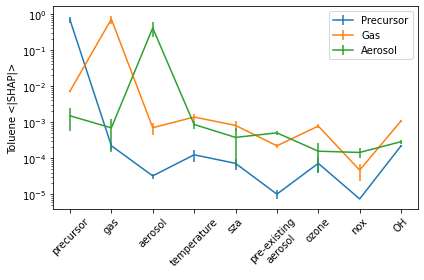

In [18]:
plt.figure()
plt.subplot(111)
plt.errorbar(range(9), pmean, yerr = psem, c = 'C0')
plt.errorbar(range(9), gmean, yerr = gsem,, c = "C1")
plt.errorbar(range(9), amean, yerr = asem, c = "C2")

plt.yscale("log")

plt.ylabel("Toluene <|SHAP|>")
#plt.xlabel("Feature")

labels = ['precursor', 'gas', 'aerosol', 'temperature', 'sza', 'pre-existing\naerosol', 'ozone', 'nox', 'OH']
plt.xticks(range(9), labels, rotation=45)

plt.legend(["Precursor", "Gas", "Aerosol"], loc = "best")

plt.tight_layout()
#plt.savefig("toluene.png")
plt.show()

In [ ]:
plt.savefig(f"{save_location}/bulk_comparison.png")

##### Compare a few experiments

In [15]:
colors = {i: f"C{i}" for i in range(9)}

In [17]:
plt.figure(figsize=(12,8))

fontsize = 14

for k, exp in enumerate(["Exp1709", "Exp1632", "Exp1769"]):
    colors = ["r", "g", "b"]
    
    pre = np.load(f"{save_location}/validation_{exp}_pre.npy")
    gas = np.load(f"{save_location}/validation_{exp}_gas.npy")
    air = np.load(f"{save_location}/validation_{exp}_aero.npy")

    plt.subplot(3, 3, k + 1)
    leg = ['gas', 'aerosol', 'temp', 'sza', 'pre-ex aero', 'ozone', 'nox', 'OH']
    for i in [1, 2, 3, 4, 5, 6, 7, 8]:
        plt.plot(range(1439), pre[:, i], c = colors[i])
    if k == 0:
        plt.ylabel("Precursor SHAP", fontsize = fontsize)
    plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')


    plt.subplot(3, 3, k + 4)
    leg = ['precursor', 'aerosol', 'temp', 'sza', 'pre-ex aero', 'ozone', 'nox', 'OH']
    for i in [0, 2, 3, 4, 5, 6, 7, 8]:
        plt.plot(range(1439), gas[:, i], c = colors[i])
    if k == 0:
        plt.ylabel("Gas SHAP", fontsize = fontsize)
    plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')

    plt.subplot(3, 3, k + 7)
    leg = ['precursor', 'gas', 'temp', 'sza', 'pre-ex aero', 'ozone', 'nox', 'OH']
    for i in [0, 1, 3, 4, 5, 6, 7, 8]:
        plt.plot(range(1439), air[:, i], c = colors[i])
    if k == 0:
        plt.ylabel("Aerosol SHAP", fontsize = fontsize)
    plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')

    plt.xlabel("Time (s)", fontsize = 14)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'toluene/validation_Exp1709_pre.npy'

<Figure size 864x576 with 0 Axes>

In [ ]:
plt.savefig(f"{save_location}/exp_comparison.png")